In [1]:
# Notebook para exploração inicial do dataset "Meteorite Landings"
import pandas as pd
import numpy as np
import math
import seaborn as sns


df1 = pd.read_csv('datasets/meteorite_landings.csv', on_bad_lines='warn') # Dataset 1: Meteorite Landings
df1.head(3) 

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"


## Variável 'mass'

### Calculando as medidas de centralidade da variável 'mass'

- Média

In [9]:
#remove os valores nan antes de calcular a média na coluna 'mass'
media_massa = np.nanmean(df1['mass'])
media_massa

13278.078548601516

- Mediana

In [ ]:
mediana_massa = np.median(df1.sort_values(by='mass').dropna()['mass'])
mediana_massa

29.09

### Agora calculando as medidas de dispersão da variável 'mass'

- Variância

In [10]:
var_massa = np.var(df1['mass'])

var_massa

330604955342.3177

- Desvio Padrão

In [ ]:
desvio_massa = math.sqrt(var_massa)
desvio_massa

574982.5695986946

- Moda

In [ ]:
moda_massa = df1['mass'].mode()
moda_massa

0    1.3
Name: mass, dtype: float64

- Boxplot 

In [32]:
df1['log mass'] = np.log10(df1['mass']) #criando a escala em log para diminuir a distorção
                                        #ele deu esse erro, mas produziu mesmo assim

c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='log mass'>

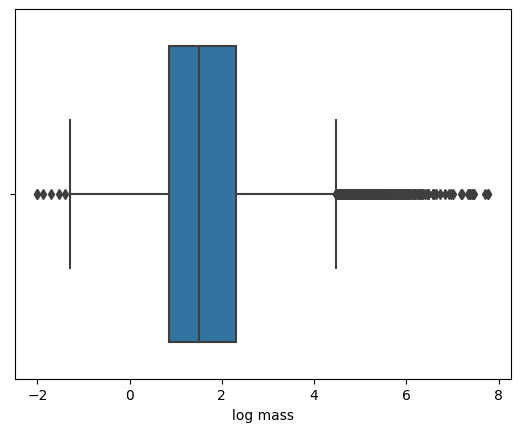

In [33]:
import seaborn as sns

sns.boxplot(df1, x="log mass")


- Histograma


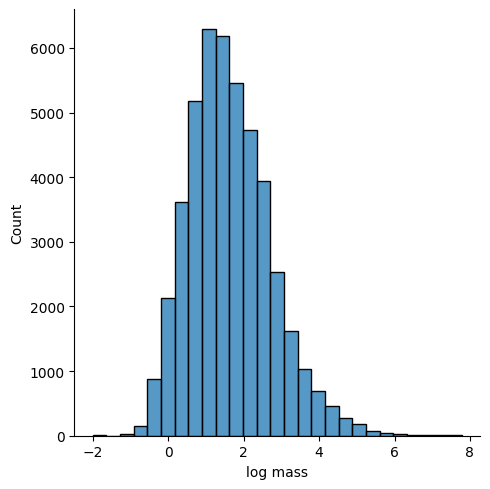

In [14]:
sns.displot(data=df1,x='log mass', bins=27)

## Variável 'year'

- Aqui faremos uma verificação do ano em que o meteorito foi descoberto, pois existem algumas incoerências. 
  
  Faremos essa verificação utilizando como base o site [The Meteoritical Society](https://www.lpi.usra.edu/meteor/metbull.php).
  

In [8]:

years_bug = [i for i in df1['year'] if i >= 2016 or i <= 860 ] # pega os anos incoerentes

index_bug = [i for i in df1.index if df1.loc[i, 'year'] in years_bug] # pega os índices dos elementos problemáticos 

name_years_bug = [df1['name'].loc[i] for i in df1.index if df1.loc[i, 'year'] in years_bug] # pega o nome dos elementos para a verificação no site

print(name_years_bug)
index_bug


[]


[]

- Agora vamos corrigir as informações no dataframe:

In [13]:
ind_remove = [703, 16356, 30679, 38188, 38301]

df1 = df1.drop(index_bug) #removendo os rows em que os anos são problemáticos


### Calculando as medidas de centralidade da variável 'year'

- Média

In [14]:
media_anos = int(np.nanmean(df1['year']))
media_anos


1991

- Mediana

In [4]:
(df1.sort_values(by='year', ascending=False).dropna()['year']).median()



1996.0

- Moda

In [16]:
moda_anos = df1['year'].mode(dropna='True')
moda_anos

0    2003.0
Name: year, dtype: float64

### Calculando as medidas de dispersão da variável 'year'

- Variância

In [17]:
var_anos = np.var(df1['year'])
var_anos 

599.189640425593

- Desvio Padrão

In [18]:
desvio_anos = df1.std(numeric_only=True).dropna()['year']
desvio_anos 

24.47861989661346

- Histograma 

<Axes: ylabel='Frequency'>

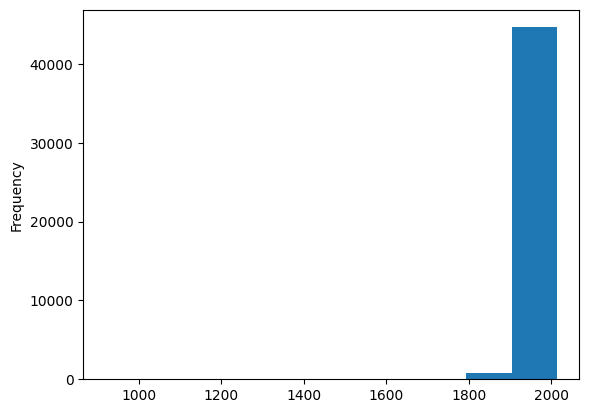

In [19]:
df1['year'].plot.hist()

- Boxplot 

<Axes: xlabel='log year'>

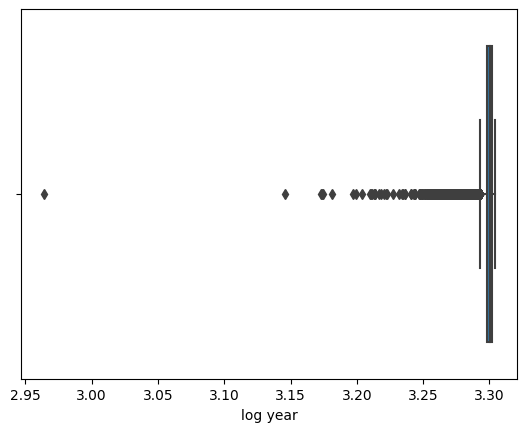

In [20]:
year_copy = (df1[df1['year'] > 0]).copy()

df1['log year'] = np.log10(year_copy['year'])

sns.boxplot(data=df1, x='log year') #utilizando a escala em log


<Axes: xlabel='year'>

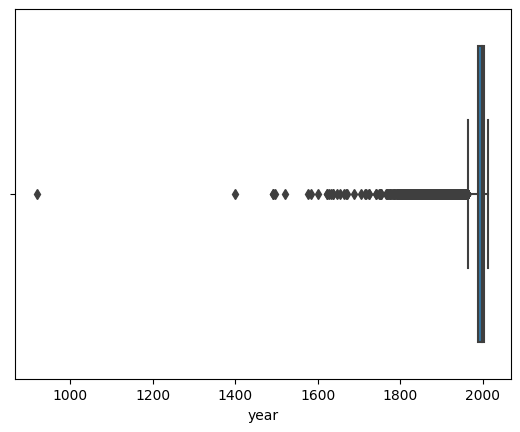

In [21]:
sns.boxplot(data=df1, x='year') #sem utilizar a escala em log

## Medidas de centralidade do Df1

- Medianas

In [22]:
print((df1.sort_values(by='year', ascending=False).dropna()['year']).median()) # mediana de 'year'

print((df1.sort_values(by='mass', ascending=False).dropna()['mass']).median()) # mediana de 'mass'

print((df1.sort_values(by='reclat', ascending=False).dropna()['reclat']).median()) # mediana de 'reclat'

print((df1.sort_values(by='reclong', ascending=False).dropna()['reclong']).median()) # mediana de 'reclong'


1996.0
29.08
-71.5
35.66667


- Médias

In [23]:
df1.mean(numeric_only='True')

id          26889.736628
mass        13278.932641
year         1991.851331
reclat        -39.131696
reclong        61.079448
log year        3.299222
dtype: float64

- Modas

In [24]:
df1.mode(dropna='True')[['mass', 'year', 'fall']].head(1)

,mass,year,fall
0,1.3,2003.0,Found


## Medidas de Dispersão do Df1

- Desvio padrão

In [25]:
df1.std(numeric_only=True).dropna() 


id           16860.791462
mass        575007.788451
year            24.478620
reclat          46.374260
reclong         80.647188
log year         0.005652
dtype: float64

- Variâncias

In [26]:
df1.var(numeric_only=True).dropna()

id          2.842863e+08
mass        3.306340e+11
year        5.992028e+02
reclat      2.150572e+03
reclong     6.503969e+03
log year    3.194326e-05
dtype: float64

## Visualizações do df1

<Axes: >

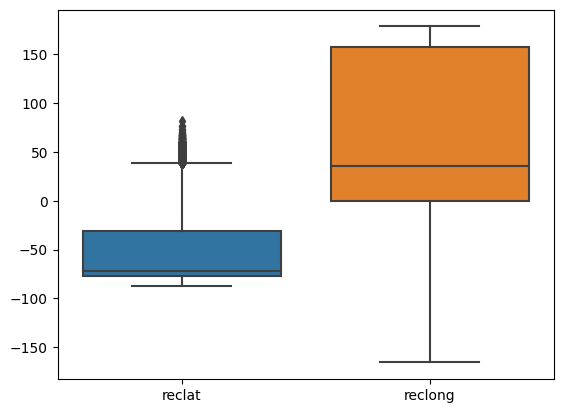

In [78]:
sns.boxplot(data=df1[['reclat', 'reclong']])

#boxplot das variáveis reclat e reclong

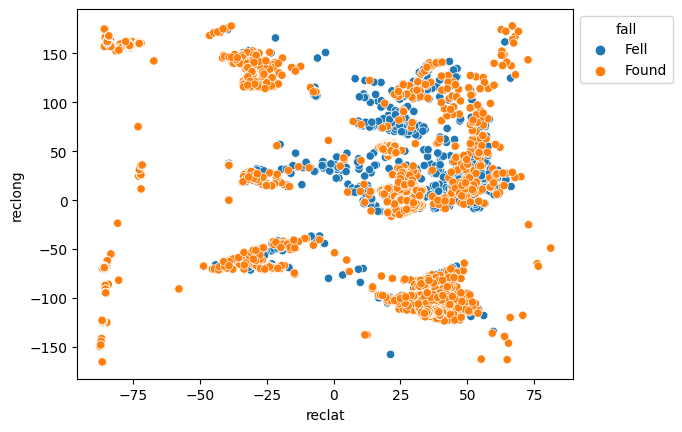

In [27]:
df1['reclong'] = df1['reclong'].map(lambda x : 61.074319 if (x > 180 or x < - 180) else x) #correção de incoerências das colunas 'reclat' e 'reclong'
df1['reclat'] = df1['reclat'].map(lambda x : -39.122580 if (x == 0) else x)

ax = sns.scatterplot(data=df1, x='reclat',y='reclong', hue='fall') # Gráfico exibindo as localizações dos meteoritos
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

<Axes: >

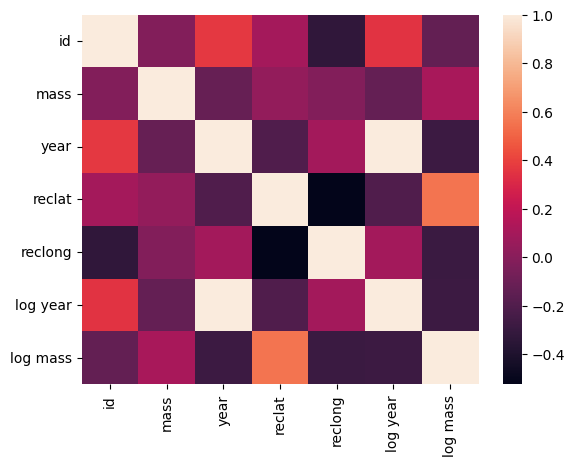

In [41]:
sns.heatmap(df1.corr(numeric_only=True)) #representação da correlação entre os elementos do df1

<Axes: xlabel='year', ylabel='mass'>

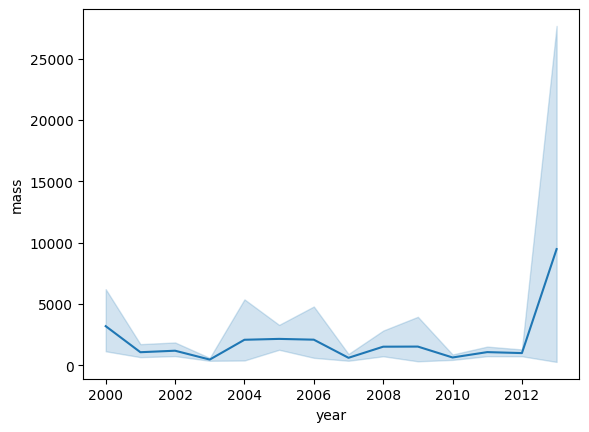

In [65]:
year_cut = df1[df1['year'] >=2000]

sns.lineplot(data=year_cut, x='year', y='mass') #gráfico da variação do tamanho da massa entre os anos 2000